In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import r2_score
from tensorflow import keras

In [2]:
df1 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave2.tab',sep='\t',low_memory=False)
df2 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave4.tab',sep='\t',low_memory=False)
df3 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave6.tab',sep='\t',low_memory=False)
df4 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave8.tab',sep='\t',low_memory=False)

In [3]:
Dict= {1:df1,
       2:df2,
       3:df3,
       4:df4
       }

In [4]:
masterlist=[]
for i in range (0,Dict[1].shape[0]):
    featurelist=[]
    for k in range (1,len(Dict)+1):
        featurelist.append(Dict[k].iloc[i].squeeze())
    featurearr=np.array(featurelist) # convert list to np.array
    masterlist.append(featurearr)#add array of seiries to masterlist
Dataset=np.array(masterlist)

In [5]:
n_steps=3
X=Dataset[:,:n_steps,:] 
y=Dataset[:,n_steps,:] 

In [6]:
print('X shape == {}.'.format(X.shape))
print('y shape == {}.'.format(y.shape))

X shape == (2820, 3, 25).
y shape == (2820, 25).


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=32,train_size=0.8)

Seperate IDS from arrays

In [8]:
X_trainIDs=X_train[:,:,0]
y_trainIDs=y_train[:,0]
X_testIDs=X_test[:,:,0]
y_testIDs=y_test[:,0]

In [9]:
X_train=X_train[:,:,1:]
X_test=X_test[:,:,1:]
y_train=y_train[:,1:]
y_test=y_test[:,1:]

In [10]:
print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))
print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))


X_train shape == (2256, 3, 24).
y_train shape == (2256, 24).
X_test shape == (564, 3, 24).
y_test shape == (564, 24).


In [11]:
# opt = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.00005)

In [12]:
model= Sequential()
model.add(Conv1D(filters=24, kernel_size=2, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(LSTM(24,return_sequences=True,activation='relu'))
model.add(LSTM (12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[2], activation='linear'))
model.compile(loss = "mse", optimizer = opt , metrics=['mae'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 24)             1176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 24)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 48)            0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 1, 24)             7008      
                                                                 
 lstm_1 (LSTM)               (None, 12)                1

In [14]:
history = model.fit(X_train, y_train, epochs=35,validation_split=0.2, batch_size=8, verbose=1)

Epoch 1/35
226/226 [==============================] - 3s 3ms/step - loss: 0.0690 - mae: 0.1842 - val_loss: 0.0687 - val_mae: 0.1785
Epoch 2/35
226/226 [==============================] - 0s 2ms/step - loss: 0.0613 - mae: 0.1682 - val_loss: 0.0582 - val_mae: 0.1593
Epoch 3/35
226/226 [==============================] - 0s 2ms/step - loss: 0.0488 - mae: 0.1538 - val_loss: 0.0423 - val_mae: 0.1405
Epoch 4/35
226/226 [==============================] - 1s 2ms/step - loss: 0.0377 - mae: 0.1394 - val_loss: 0.0317 - val_mae: 0.1190
Epoch 5/35
226/226 [==============================] - 0s 2ms/step - loss: 0.0315 - mae: 0.1257 - val_loss: 0.0262 - val_mae: 0.1033
Epoch 6/35
226/226 [==============================] - 0s 2ms/step - loss: 0.0274 - mae: 0.1149 - val_loss: 0.0221 - val_mae: 0.0912
Epoch 7/35
226/226 [==============================] - 0s 2ms/step - loss: 0.0246 - mae: 0.1066 - val_loss: 0.0193 - val_mae: 0.0819
Epoch 8/35
226/226 [==============================] - 1s 2ms/step - loss: 0.

<function matplotlib.pyplot.show(close=None, block=None)>

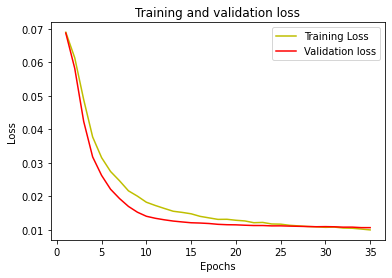

In [15]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'y',label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_for_wave8_output.png')
plt.show

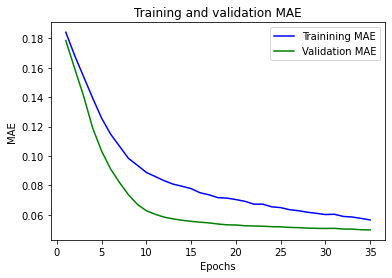

In [16]:
acc= history.history['mae']
val_acc= history.history['val_mae']
plt.plot(epochs,acc, 'b', label='Trainining MAE')
plt.plot(epochs, val_acc, 'g', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig(r'Accuracy_for_wave8_output.png')
plt.show()

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
adjr2=1-(((1-r2)*(len(y)-1))/((len(y)-X.shape[1]-1)))
print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('r2: %.3f' % r2)
print('adjr2: %.3f' % adjr2)

MSE: 0.007
MAE: 0.044
MAPE: 864935446262.267
r2: -0.026
adjr2: -0.028


In [19]:
#load scaler back
from pickle import load
scaler = load(open('scaler.pkl', 'rb')) 
#reverse transform problem with underfitting
y_pred=scaler.inverse_transform(y_pred)

In [20]:

predicted = pd.DataFrame(y_pred, columns = df2.iloc[:,1:].columns)

In [21]:

predicted.insert(0, "idauniq",y_testIDs )


In [22]:
predicted

,idauniq,sys1,sys2,sys3,dias1,dias2,dias3,pulse1,pulse2,pulse3,...,rtin,hscrp,hgb,hba1c,mmgsd1,mmgsd2,mmgsd3,mmgsn1,mmgsn2,mmgsn3
0,111219.0,134.342300,135.734161,150.895844,81.668304,86.632690,78.964615,67.245781,80.425934,56.085350,...,132.986328,6.654447,117.139297,37.110771,22.370287,24.701563,22.544424,20.590324,21.681904,21.972555
1,107792.0,137.675003,146.461136,143.828705,80.213509,81.013954,81.182289,72.375526,77.367462,77.305748,...,141.446808,2.626442,129.377319,39.417942,25.804808,26.411661,26.931335,23.818277,24.657568,24.041161
2,118271.0,148.826843,154.824387,141.986084,81.096352,76.852257,88.905724,77.163002,73.511703,105.113693,...,175.262543,-0.559482,148.369736,43.620152,30.512093,29.244555,32.345848,27.906082,28.780659,27.424660
3,108337.0,125.107056,129.378952,152.223846,83.841362,94.352119,75.929970,60.715870,80.884880,35.138260,...,114.194649,8.147246,106.696022,35.118099,19.653984,22.907099,19.466383,18.023359,19.672276,20.098719
4,117583.0,137.948792,136.884369,162.867218,90.036835,97.537682,82.056564,69.755371,79.294716,54.111469,...,141.684113,7.231219,122.052246,38.638084,22.719521,26.261074,21.963085,20.554863,22.222328,22.682436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,105129.0,136.423233,141.433960,144.583267,78.610786,81.260445,80.202881,70.809418,79.830452,68.846100,...,136.949539,4.448063,123.189659,38.173878,24.251190,25.326166,25.096699,22.388077,23.056206,23.046383
560,120021.0,125.857025,127.306793,153.895798,82.543846,94.074486,76.760574,59.904152,81.565125,31.752655,...,117.362892,9.140274,104.646873,35.008835,19.167156,22.428322,18.760851,17.332563,19.038467,20.004246
561,120041.0,136.163788,141.413376,145.189728,79.991020,83.503601,81.276039,70.943092,78.987465,68.767212,...,138.627747,4.275245,124.373726,38.518681,24.449423,25.520443,25.210291,22.444401,23.272888,23.264338
562,108845.0,123.651306,131.300476,139.035965,77.632797,85.806976,76.959877,62.930603,79.445274,47.031578,...,114.981560,6.143569,109.240501,35.166710,21.043118,22.560177,21.753511,19.351257,20.450178,20.745361


In [24]:
predicted.to_csv(r'C:\Users\Manos\Desktop\Lstm Prediction',sep='\t',index=False)